# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

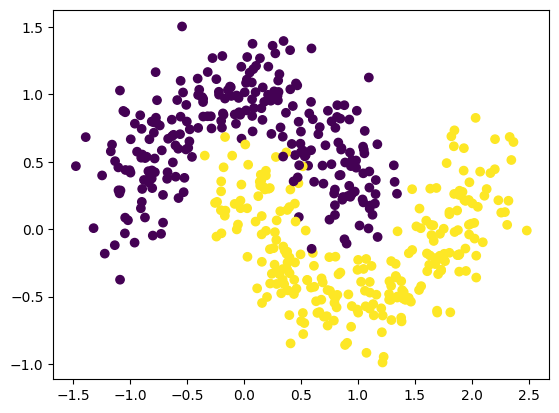

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', solver='saga', max_iter=500, tol=0.0001)
svm = SVC(kernel='linear', C=2)

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

SVC(C=2, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

print(f'logreg accuracy score: {accuracy_score(moons_labels, lr.predict(moons_points))}')
print(f'SVC accuracy score: {accuracy_score(moons_labels, svm.predict(moons_points))}')

logreg accuracy score: 0.856
SVC accuracy score: 0.862


In [ ]:
def logreg_plot_decisions(dataset, target, estimator):
    plt.scatter(dataset[:, 0], dataset[:, 1], c=target, cmap='autumn')

    b = estimator.intercept_[0]
    w1, w2 = estimator.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2

    # Plot the data and the classification with the decision boundary.
    xmin, xmax = -2, 3
    ymin, ymax = -1.5, 2

    xd = np.array([xmin, xmax])
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

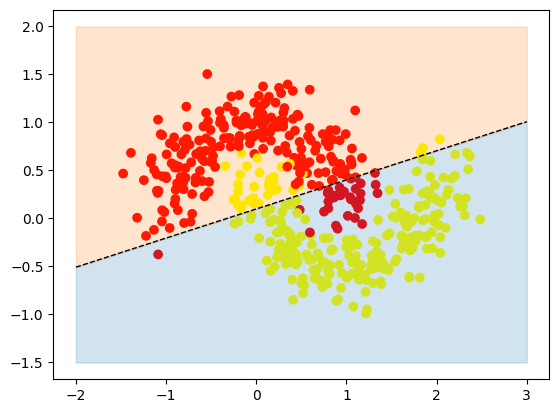

In [ ]:
logreg_plot_decisions(moons_points, moons_labels, lr)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

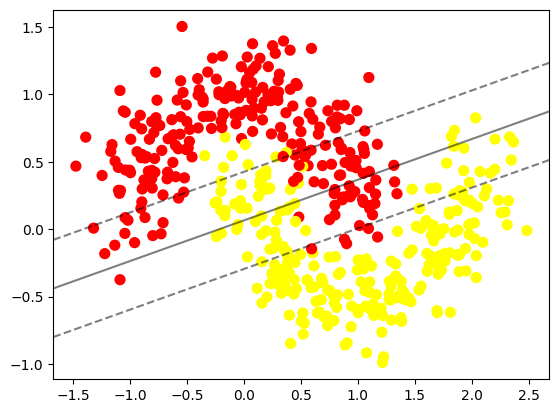

In [ ]:
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, s=50, cmap='autumn')
plot_svc_decision_function(svm);

Obviously, the relationship is nonlinear, so linear models build unsuccessful dividing surfaces.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [ ]:
poly_svm_list = {
    2: SVC(kernel='poly', degree=2, C=1e4),
    3: SVC(kernel='poly', degree=3, C=1e3),
    4: SVC(kernel='poly', degree=4, C=1e3),
    5: SVC(kernel='poly', degree=5, C=1e3),
    6: SVC(kernel='poly', degree=6, C=1e2),
    7: SVC(kernel='poly', degree=6, C=1e2),
    9: SVC(kernel='poly', degree=6, C=1e2),
    13: SVC(kernel='poly', degree=10, C=10),
    15: SVC(kernel='poly', degree=15, C=10),
    17: SVC(kernel='poly', degree=15, C=10),
}
rbf_svm = SVC(kernel='rbf', C =1e6)
sigmoid_svm = SVC(kernel='sigmoid', C=1e6)

Polynomial SVC, degree: 2. Accuracy score: 0.748
Polynomial SVC, degree: 3. Accuracy score: 0.892
Polynomial SVC, degree: 4. Accuracy score: 0.746
Polynomial SVC, degree: 5. Accuracy score: 0.89
Polynomial SVC, degree: 6. Accuracy score: 0.742
Polynomial SVC, degree: 7. Accuracy score: 0.742
Polynomial SVC, degree: 9. Accuracy score: 0.742
Polynomial SVC, degree: 13. Accuracy score: 0.716
Polynomial SVC, degree: 15. Accuracy score: 0.794
Polynomial SVC, degree: 17. Accuracy score: 0.794
RBF SVC. Accuracy score: 0.99
Sigmoid SVC. Accuracy score: 0.642


Text(0.5, 1.0, 'Sigmoid kernel')

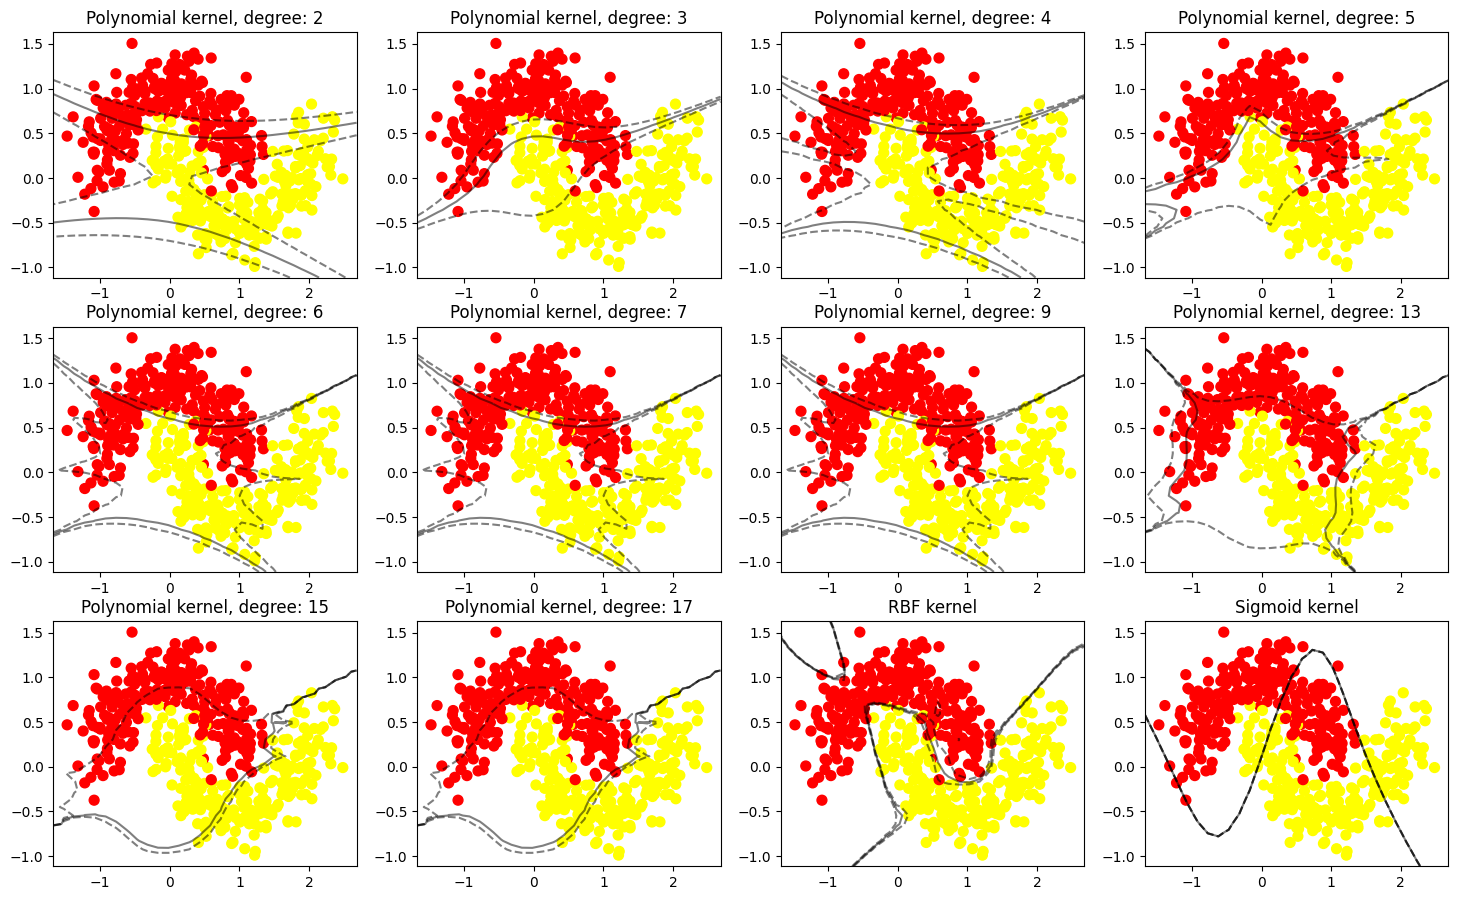

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplots_adjust(top=1.5)

for i, degree in enumerate(poly_svm_list):
    plt.subplot(3, 4, i + 1)
    poly_svm_list[degree].fit(moons_points, moons_labels)

    print(f'Polynomial SVC, degree: {degree}. Accuracy score: {accuracy_score(moons_labels, poly_svm_list[degree].predict(moons_points))}')


    plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, s=50, cmap='autumn')
    plot_svc_decision_function(poly_svm_list[degree]);
    plt.title(f'Polynomial kernel, degree: {degree}')

rbf_svm.fit(moons_points, moons_labels)
print(f'RBF SVC. Accuracy score: {accuracy_score(moons_labels, rbf_svm.predict(moons_points))}')
plt.subplot(3, 4, 11)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, s=50, cmap='autumn')
plot_svc_decision_function(rbf_svm);
plt.title('RBF kernel')

plt.subplot(3, 4, 12)
sigmoid_svm.fit(moons_points, moons_labels)
print(f'Sigmoid SVC. Accuracy score: {accuracy_score(moons_labels, sigmoid_svm.predict(moons_points))}')
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, s=50, cmap='autumn')
plot_svc_decision_function(sigmoid_svm);
plt.title('Sigmoid kernel')

It is obvious that among the polynomial kernels, the kernel of the third degree turned out to be the best, since the cubic parabola is indeed a good dividing surface. But the RBF kernel showed the highest speed among all kernels, it is almost equal to 1. Note that among the new models, only degrees 3 and 5, as well as RBF, performed better than the linear kernel and logistic regression.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

From the analysis above it follows that to generate new features it is worth choosing a polynomial of degree 3.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
extended_moons_points = np.hstack((moons_points[:, 1][:, np.newaxis], poly.fit_transform(moons_points[:, 0][:, np.newaxis])))

In [ ]:
lr = LogisticRegression(penalty='l2', solver='saga', max_iter=500, tol=0.0001, fit_intercept=False)
lr.fit(extended_moons_points, moons_labels)
print(f'logreg accuracy score: {accuracy_score(moons_labels, lr.predict(extended_moons_points))}')

logreg accuracy score: 0.956


In [ ]:
lr.coef_

array([[-4.87856415,  1.9986668 , -0.80221894, -3.88960806,  2.91188963]])

In [ ]:
def cubic_logreg_plot_decisions(dataset, target, estimator):
    plt.scatter(dataset[:, 0], dataset[:, 1], c=target, cmap='autumn')

    b = estimator.intercept_[0]
    wy, d, w1, w2, w3 = estimator.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    d = -d/wy
    a = -w1/wy
    b = -w2/wy
    c = -w3/wy

    # Plot the data and the classification with the decision boundary.
    xmin, xmax = -2, 3
    ymin, ymax = -1.5, 2

    plt.ylim(ymin, ymax)
    plt.xlim(xmin, xmax)

    xd = np.linspace(xmin, xmax, 500)
    yd = d + a * xd + b * xd ** 2 + c * xd ** 3
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

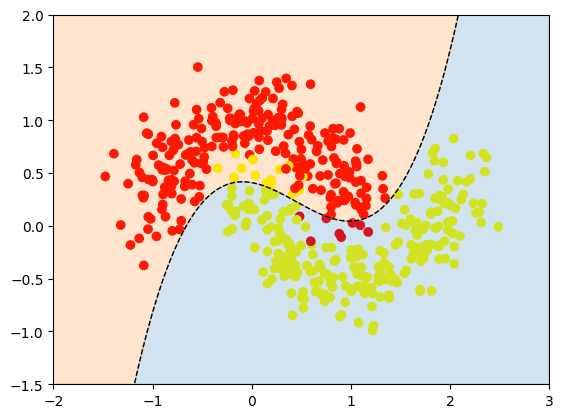

In [ ]:
cubic_logreg_plot_decisions(moons_points, moons_labels, lr)

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

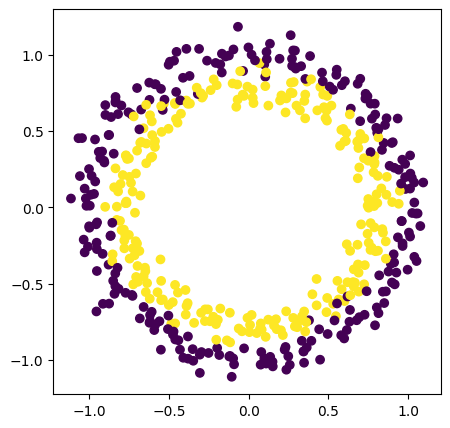

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

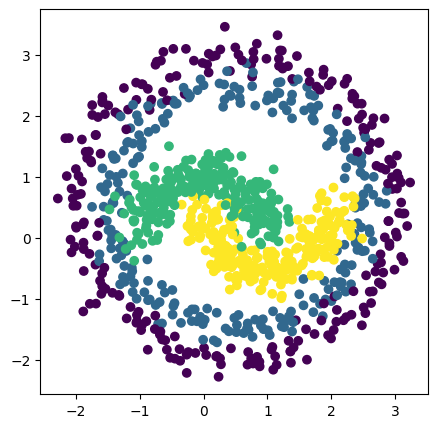

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
def plot_svc_decision_function_extended(model, degree=None, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = (-2, 3)
    ylim = (-2, 3)

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)

    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    yx = np.vstack([Y.ravel(), X.ravel()]).T
    if degree:
        P = model.predict(np.hstack((yx[:, 0][:, np.newaxis], poly.fit_transform(yx[:, 1][:, np.newaxis])))).reshape(X.shape)
    else:
        P = model.predict(yx).reshape(X.shape)

    # plot decision boundary and margins
    plt.contourf(X, Y, P, cmap=plt.cm.coolwarm, alpha=0.8)


    # plot support vectors
    # print("support vectors: ", model.support_vectors_)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

RBF SVC. Degree: 1. Accuracy score: 0.953
RBF SVC. Degree: 2. Accuracy score: 0.953
RBF SVC. Degree: 3. Accuracy score: 0.95
RBF SVC. Degree: 4. Accuracy score: 0.939
RBF SVC. Degree: 5. Accuracy score: 0.856


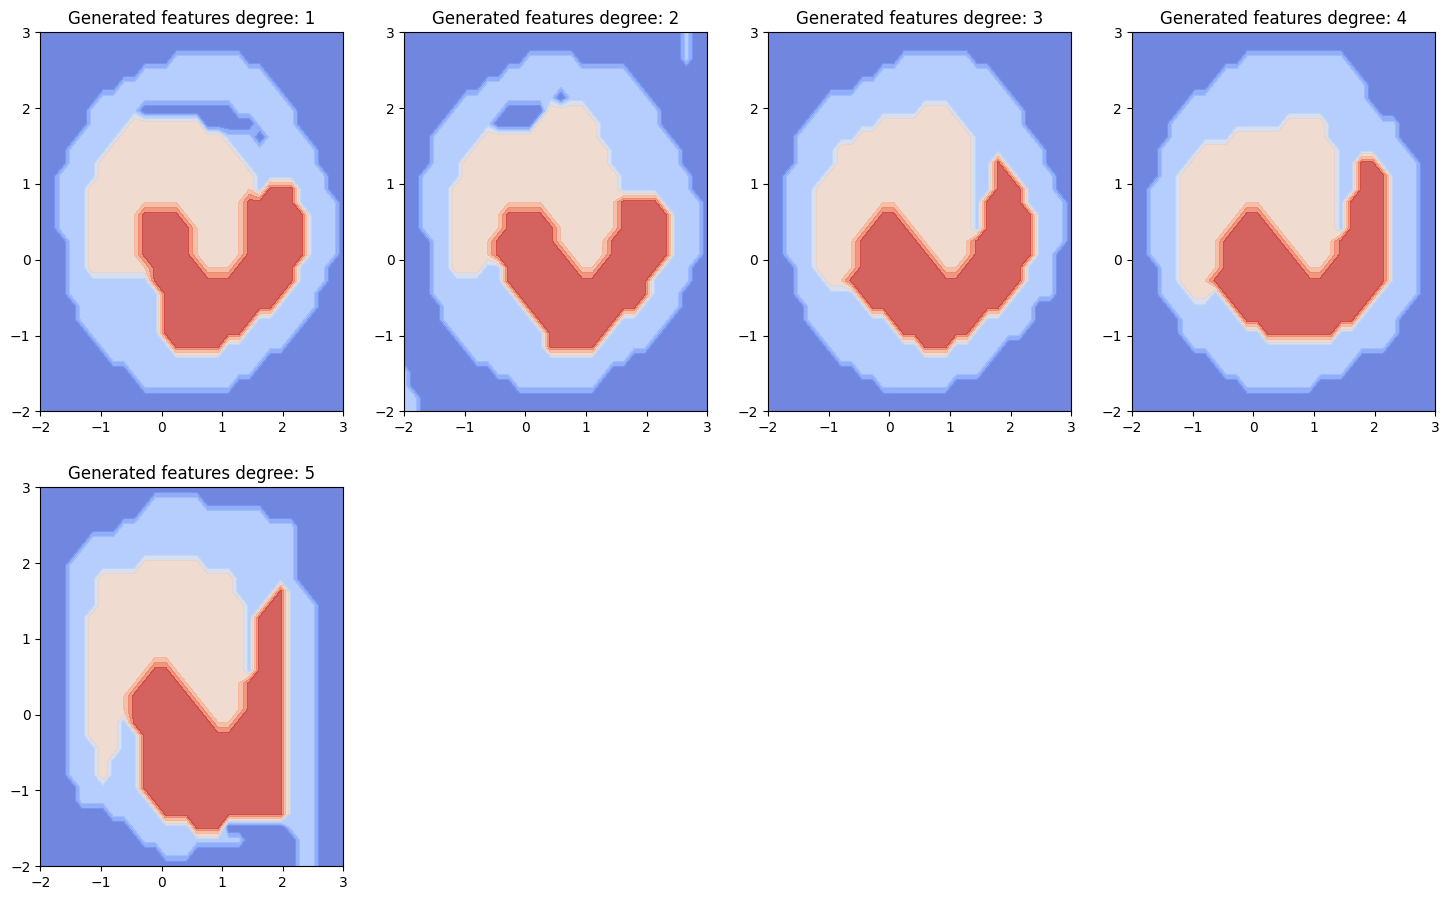

In [ ]:
rbf_svm = SVC(kernel='rbf', decision_function_shape='ovo', C=1e4)
features_degree_list = np.arange(1, 6)

plt.figure(figsize=(18, 6))
plt.subplots_adjust(top=1.5)

for i, features_degree in enumerate(features_degree_list):
    plt.subplot(2, 4, i + 1)
    poly = PolynomialFeatures(degree=features_degree)
    extended_points = np.hstack((points[:, 1][:, np.newaxis], poly.fit_transform(points[:, 0][:, np.newaxis])))
    rbf_svm.fit(extended_points, labels)
    print(f'RBF SVC. Degree: {features_degree}. Accuracy score: {accuracy_score(labels, rbf_svm.predict(extended_points))}')

    # plt.scatter(points[:, 0], points[:, 1], c=labels, s=25, cmap='autumn')
    plot_svc_decision_function_extended(rbf_svm, features_degree)
    plt.title(f'Generated features degree: {features_degree}')

Miracle! SVM with RBF kernel does a great job!

In [ ]:
# !pip install catboost

In [ ]:
from catboost import CatBoostClassifier

classifier = CatBoostClassifier()
upd_points = np.hstack((points[:, 1][:, np.newaxis], points[:, 0][:, np.newaxis]))
classifier.fit(upd_points, labels)
print(f'Accuracy score: {accuracy_score(labels, classifier.predict(upd_points))}')

Learning rate set to 0.079127
0:	learn: 1.2959089	total: 6.81ms	remaining: 6.81s
1:	learn: 1.2214809	total: 14.7ms	remaining: 7.31s
2:	learn: 1.1524157	total: 20.5ms	remaining: 6.81s
3:	learn: 1.0890761	total: 23.9ms	remaining: 5.95s
4:	learn: 1.0353230	total: 27.4ms	remaining: 5.46s
5:	learn: 0.9919093	total: 29.7ms	remaining: 4.92s
6:	learn: 0.9502458	total: 31.7ms	remaining: 4.5s
7:	learn: 0.9145745	total: 33.8ms	remaining: 4.19s
8:	learn: 0.8835443	total: 37.3ms	remaining: 4.1s
9:	learn: 0.8538864	total: 39.4ms	remaining: 3.9s
10:	learn: 0.8261989	total: 42.8ms	remaining: 3.85s
11:	learn: 0.8041542	total: 44.9ms	remaining: 3.7s
12:	learn: 0.7785746	total: 58.9ms	remaining: 4.47s
13:	learn: 0.7547946	total: 64.2ms	remaining: 4.52s
14:	learn: 0.7372895	total: 70.8ms	remaining: 4.65s
15:	learn: 0.7131515	total: 75.4ms	remaining: 4.64s
16:	learn: 0.6936299	total: 82ms	remaining: 4.74s
17:	learn: 0.6744285	total: 87.1ms	remaining: 4.75s
18:	learn: 0.6551355	total: 92.6ms	remaining: 4.78

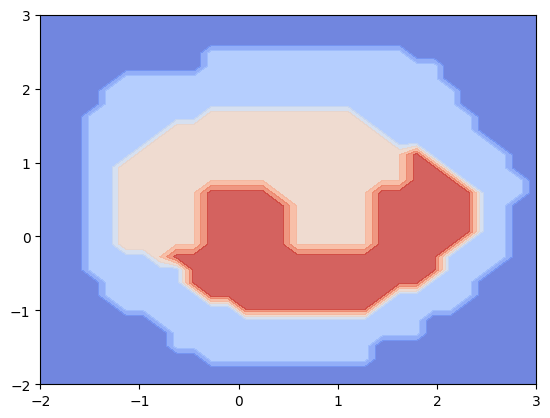

In [ ]:
plot_svc_decision_function_extended(classifier)

Gradient boosting beat all models above.